In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("census.csv")

In [3]:
cols = ['age', 'workclass', 'fnwgt',
         'education', 'education-num',
         'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain',
         'capital-loss', 'hours-per-week',
         'native-country', 'flag']

In [4]:
df.head()

,age,workclass,fnwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.describe()

,age,fnwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


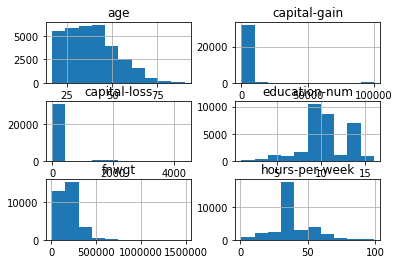

In [6]:
df.hist();

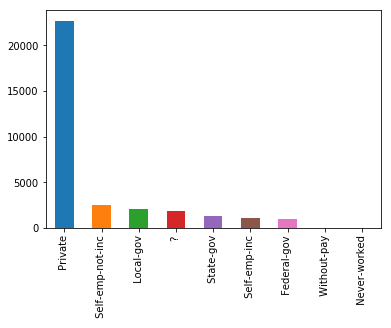

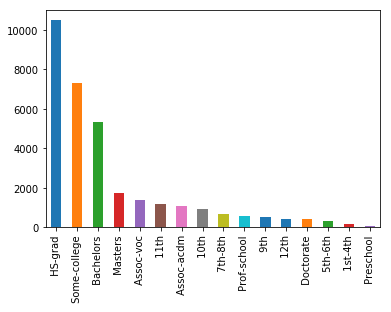

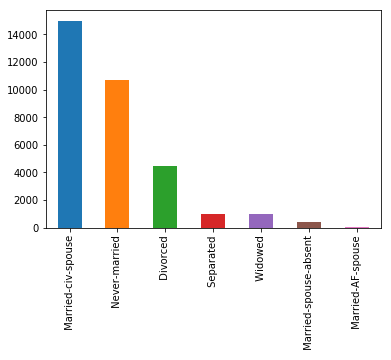

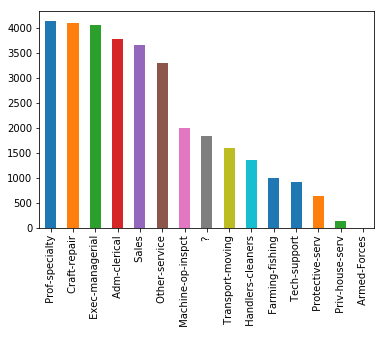

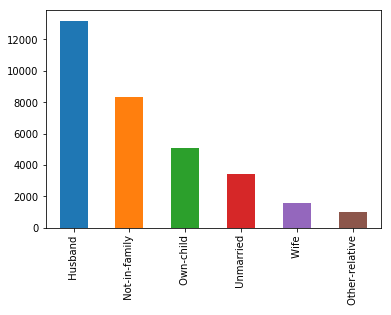

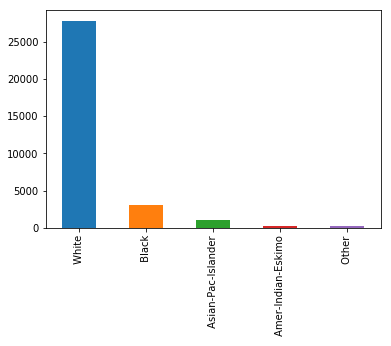

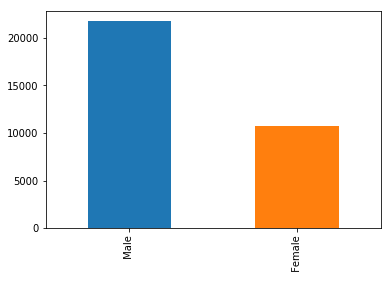

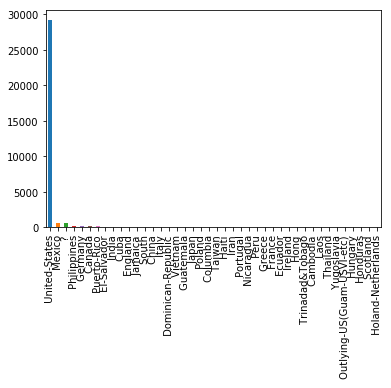

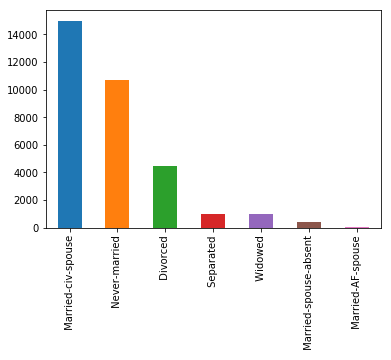

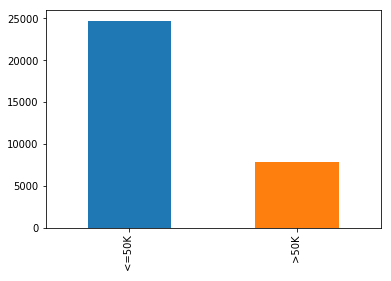

In [7]:
df['workclass'].value_counts().plot(kind='bar');
plt.show()
df['education'].value_counts().plot(kind='bar');
plt.show()
df['marital-status'].value_counts().plot(kind='bar');
plt.show()
df['occupation'].value_counts().plot(kind='bar');
plt.show()
df['relationship'].value_counts().plot(kind='bar');
plt.show()
df['race'].value_counts().plot(kind='bar');
plt.show()
df['sex'].value_counts().plot(kind='bar');
plt.show()
df['native-country'].value_counts().plot(kind='bar');
plt.show()
df['marital-status'].value_counts().plot(kind='bar');
plt.show()
df['flag'].value_counts().plot(kind='bar');
plt.show()

In [8]:
for idx, row in df.iterrows():
    print(row)
    for key, obj in row.iteritems():
        if isinstance(obj, str) and obj.startswith(" "):
            print(key, "-----", obj.strip())
    break

age                           39
workclass              State-gov
fnwgt                      77516
education              Bachelors
education-num                 13
marital-status     Never-married
occupation          Adm-clerical
relationship       Not-in-family
race                       White
sex                         Male
capital-gain                2174
capital-loss                   0
hours-per-week                40
native-country     United-States
flag                       <=50K
Name: 0, dtype: object
workclass ----- State-gov
education ----- Bachelors
marital-status ----- Never-married
occupation ----- Adm-clerical
relationship ----- Not-in-family
race ----- White
sex ----- Male
native-country ----- United-States
flag ----- <=50K


### Preprocessing

In [9]:
# first remove that nasty extra leading string
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [10]:
# workclass, occupation, and native-country contain ?
# we will drop those rows
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']

In [11]:
len(df)

30162

In [12]:
#education-num serves the purpose to reduce the categorical variable.
# We must add everything else
# The following:
# - workclass
# - maritical-status
# - occupation
# - relationship
# - race
# - sex
# - native-country
# - flag

In [13]:
category_maps = {
    'workclass': {key: idx for idx, key in enumerate(set(df['workclass'])) },
    'marital-status': {key: idx for idx, key in enumerate(set(df['marital-status']))},
    'occupation': {key: idx for idx, key in enumerate(set(df['occupation']))},
    'relationship': {key: idx for idx, key in enumerate(set(df['relationship']))},
    'race': {key: idx for idx, key in enumerate(set(df['race']))},
    'sex': {key: idx for idx, key in enumerate(set(df['sex']))},
    'native-country': {key: idx for idx, key in enumerate(set(df['native-country']))},
    'flag': {'<=50K': 0, '>50K': 1}
}

In [14]:
# apply these maps
for col, category_map in category_maps.items():
    df[col + '_num'] = df[col].map(category_map)

In [15]:
df.head()

,age,workclass,fnwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country,flag,workclass_num,marital-status_num,occupation_num,relationship_num,race_num,sex_num,native-country_num,flag_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,0,3,9,0,2,0,18,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,2,0,2,3,2,0,18,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,6,2,10,0,2,0,18,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,6,0,10,3,1,0,18,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,6,0,8,5,1,1,9,0


In [16]:
def bucket_age(row_age):
    age_buckets = {
        0: lambda age: age < 20,
        1: lambda age: 20 <= age < 30,
        2: lambda age: 30 <= age < 40,
        3: lambda age: 40 <= age < 50,
        4: lambda age: 50 <= age < 60,
        5: lambda age: age >= 60
    }
    for age_num, evaluator in age_buckets.items():
        if evaluator(row_age):
            return age_num
    raise Exception("No age mapped")

In [17]:
df['age_num'] = df['age'].apply(lambda age: bucket_age(age))

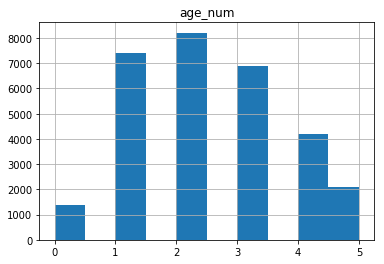

In [18]:
df[['age_num']].hist();

In [19]:
len(df)

30162

In [20]:
import seaborn as sns

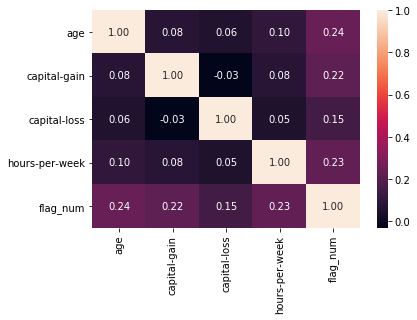

In [30]:
sns.heatmap(df[['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'flag_num']].corr(),
            annot=True,
            # cmap='coolwarm',
            fmt = ".2f");